In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

from icedef import constants, iceberg, metocean, drift, tools, simulator, test_case, plot

In [2]:
tc = test_case.TestCase()
start_latitude = tc.start_latitude
start_longitude = tc.start_longitude
start_velocity = tc.start_velocity
start_time = tc.start_time
end_time = tc.end_time
ref_times = tc.ref_times
ref_lons = tc.ref_lons
ref_lats = tc.ref_lats
start_location = (tc.start_latitude, tc.start_longitude)
time_frame = (tc.start_time, tc.end_time)
start_velocity = tc.start_velocity

# Sanity Check with Constant Current and Wind

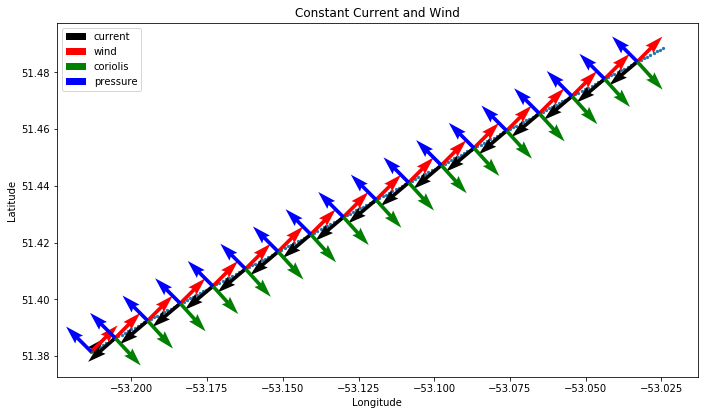

In [7]:
xds = simulator.run_test_simulation(start_location, time_frame, 
                                    constant_current_velocity=(0.1, 0.1),
                                    constant_wind_velocity=(10, 10),
                                    constant_current_acceleration=(0, 0),
                                    zero_current_force=False, 
                                    zero_wind_force=False, 
                                    zero_coriolis_force=False, 
                                    zero_pressure_force=False)


plot.plot_iceberg_track(xds['latitude'], xds['longitude'], 
                        vectors=[
                                 [xds['current_eastward_force'], xds['current_northward_force']],
                                 [xds['wind_eastward_force'], xds['wind_northward_force']],
                                 [xds['coriolis_eastward_force'], xds['coriolis_northward_force']],
                                 [xds['pressure_eastward_force'], xds['pressure_northward_force']]
                                ], 
                        arrow_colors=['black', 'red', 'green', 'blue'], 
                        arrow_labels=['current', 'wind', 'coriolis', 'pressure'],
                        save=True, title='Constant Current and Wind', 
                        filename='plots/constant_current_and_wind', autoscale_figure=True,
                        figure_scale_factor=1.5)
                        #ref_track=(ref_lats, ref_lons))